In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

# KNN - 1

In [2]:
#raw_data = pd.read_csv(r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\MLAssignments\Dataset\ObesityDataSet_Lect1.csv")
raw_data = pd.read_csv(r"E:\Nextstep\Scaler\MLAssignments\MLAssignments\Dataset\ObesityDataSet_Lect1.csv")

In [3]:
raw_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


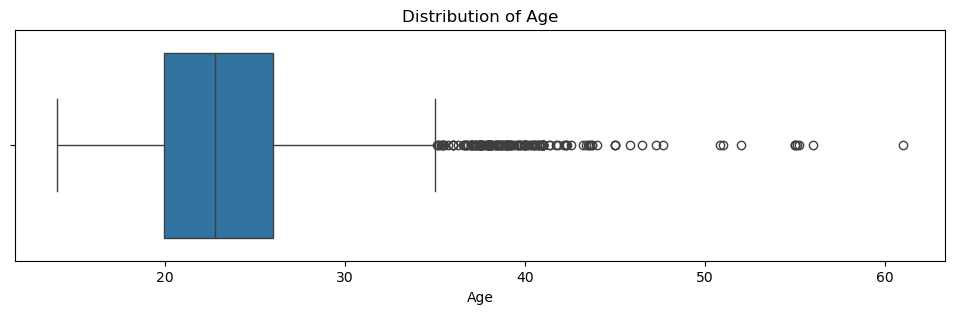

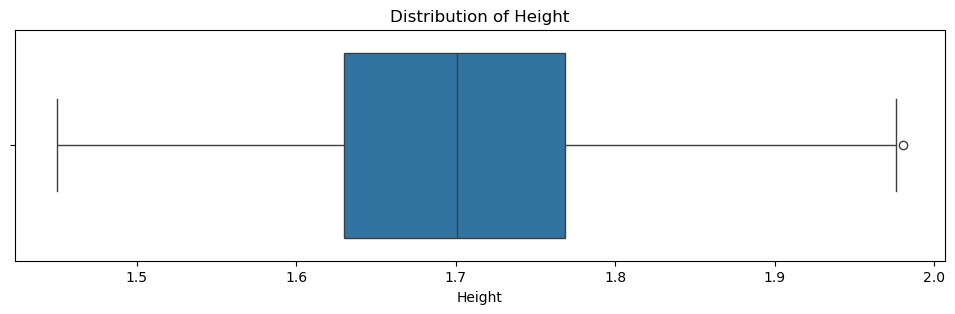

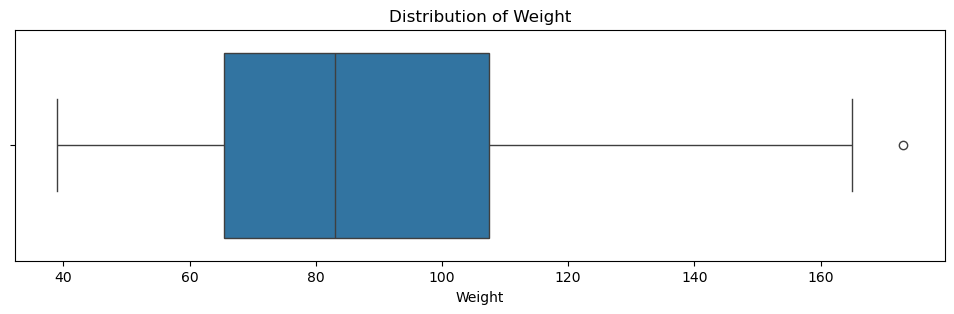

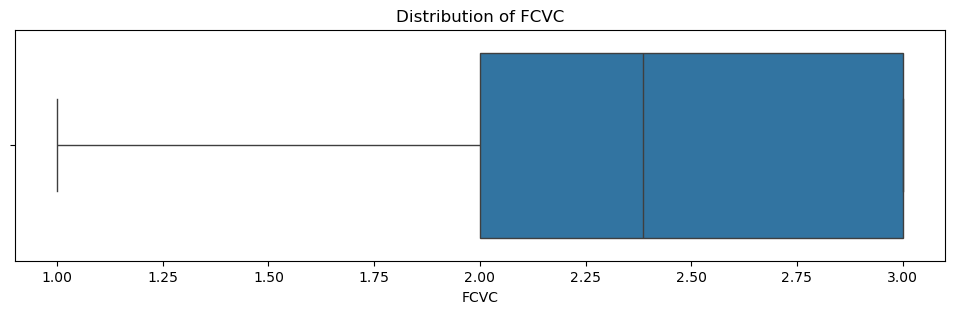

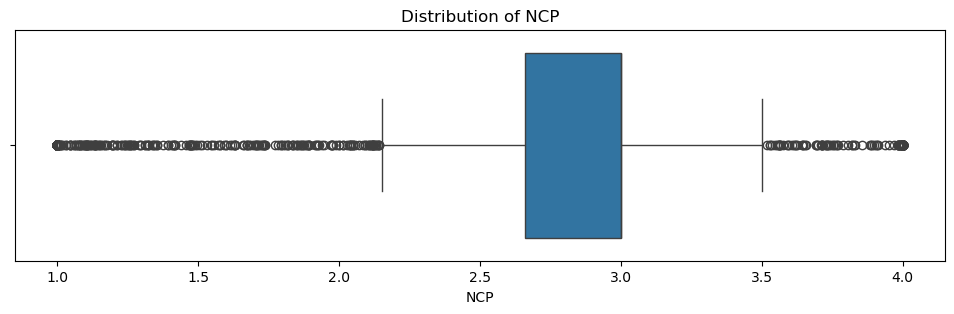

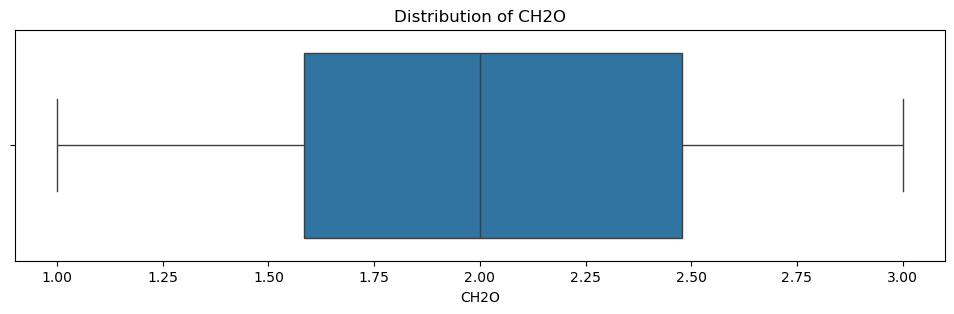

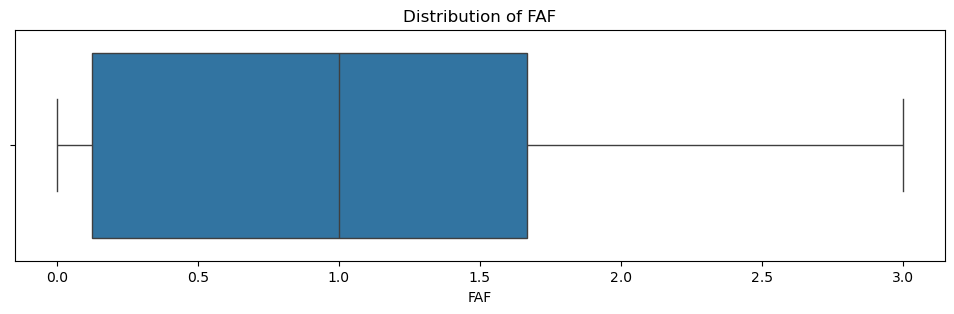

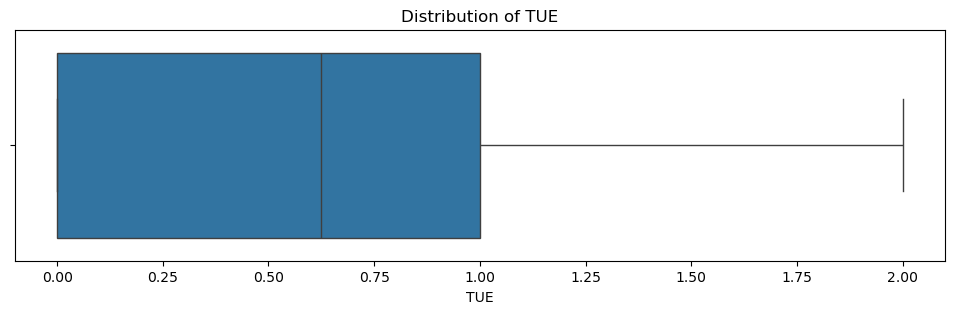

In [4]:
# Assignment: 6
num_features = list(raw_data.describe().columns)
for feature in num_features:
    plt.figure(figsize=(12,3))
    sns.boxplot(raw_data, x=feature)
    plt.title("Distribution of " + str(feature))

In [ ]:
# Assignment: 7
df = raw_data[['FCVC', 'FAF']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
euclidean_distances([df_scaled[0]], [df_scaled[-1]])

In [ ]:
# Assignment: 8
from sklearn.preprocessing import StandardScaler, LabelEncoder
from math import sqrt
from collections import Counter

In [ ]:
# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) ** 2
    return sqrt(distance)  # Hint: Final distance formula calculation step

In [ ]:
# Function to predict the label of a new data point
def predict_label(train_data, new_data_point, num_neighbors):
    distances = []
    for _, row in train_data.iterrows():
        dist = euclidean_distance(new_data_point, row[:-1])  # Hint: Calculate distance
        distances.append((row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = [dist[0] for dist in distances[:num_neighbors]]  # Hint: Neighbors selection

    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)  # Hint: Determine majority

    return prediction

In [ ]:
# Encoding the 'Gender' column
original_df = raw_data
label_encoder = LabelEncoder()
original_df['Gender'] = label_encoder.fit_transform(original_df['Gender'])  # Hint: Fit and apply encoding

# Scaling the features

scaler = StandardScaler()
original_df[['Age', 'Height', 'Weight']] = scaler.fit_transform(original_df[['Age', 'Height', 'Weight']])

# New data point
new_data = {'Gender': 'Male', 'Age': 32, 'Height': 175, 'Weight': 75}
new_data_df = pd.DataFrame([new_data])

# Encoding and scaling the new data point
new_data_df['Gender'] = label_encoder.transform(new_data_df['Gender'])  # Hint: Apply existing encoding
new_data_scaled = scaler.transform(new_data_df[['Age', 'Height', 'Weight']])  # Hint: Apply existing scaling

new_data_point = [new_data_df['Gender'].iloc[0]] + new_data_scaled.tolist()[0]

# Predicting the label
predicted_label = predict_label(original_df, new_data_point, 5)
print(f"The predicted label is: {predicted_label}")

# Lecture 2

In [ ]:
#Assignment 2

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
cat_cols = [col for col in list(raw_data.columns) if raw_data[col].dtype == 'O']
cat_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [8]:
df = raw_data.copy()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [9]:
X = df.drop('NObeyesdad', axis=1)
Y = df['NObeyesdad']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.33, random_state=42)
xtrain.shape, xtest.shape

((1414, 16), (697, 16))

In [12]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [14]:
model = KNeighborsClassifier()
model.fit(xtrain_scaled, ytrain)
print(model.score(xtrain_scaled, ytrain), model.score(xtest_scaled, ytest))

0.8741159830268741 0.8005738880918221


In [ ]:
model.score(xtrain_scaled, ytrain)

In [16]:
#assignment 4
train_acc = []
test_acc = []
for k in range(1,81):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(xtrain_scaled, ytrain)
    train_acc.append(model.score(xtrain_scaled, ytrain))
    test_acc.append(model.score(xtest_scaled, ytest))

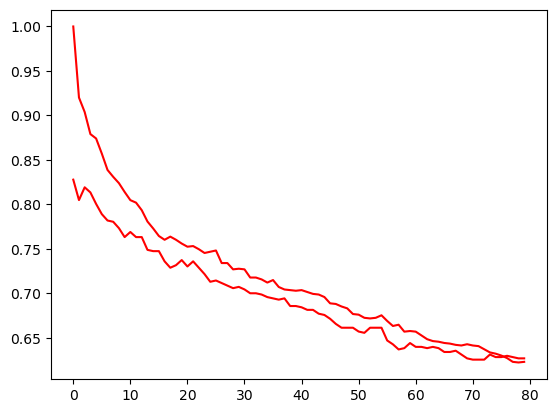

In [17]:
plt.plot(train_acc, label='Train', color = 'r')
plt.plot(test_acc, label='Train', color = 'r')